# Desafio 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy import stats
import missingno as msngo
import re

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

### Pregunta 1
Carga los datos y genera un dataFrame que excluya las columnas correspondientes 
a la abreviatura del país, código de llamada, capital, código de moneda, ciudad má 
grande, lenguaje oficial, latitud y longitud. Considerando estos datos, realiza u a
inspección inicial sobre ellos, considerando gráficos. Concluye.

In [4]:
BASE_PATH = './Datos/'
WORLD_DATA_FINELAME = 'world-data-2023.csv'
df = pd.read_csv(BASE_PATH+WORLD_DATA_FINELAME, index_col=0)
df.head()

,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [5]:
column_list = df.columns.tolist()
column_list.remove('Abbreviation')
column_list.remove('Calling Code')
column_list.remove('Capital/Major City')
column_list.remove('Currency-Code')
column_list.remove('Largest city')
column_list.remove('Official language')
column_list.remove('Latitude')
column_list.remove('Longitude')

In [6]:
remove_signs = lambda x: re.sub('([#$%&,])', '', x) if isinstance(x, str) else x

In [7]:
for col in column_list:
    df[col] = df[col].map(remove_signs)

In [8]:
df = df[column_list].astype(
    {
       'Density\n(P/Km2)': 'Int64',
       'Agricultural Land( %)':'float64',
       'CPI':'float64',
       'CPI Change (%)':'float64',
       'Forested Area (%)':'float64',
       'Land Area(Km2)': 'Int64',
       'Armed Forces size': 'Int64',
       'Birth Rate': 'float64',
       'Co2-Emissions': 'Int64',
       'Fertility Rate': 'float64',
       'GDP': 'Int64',
       'Infant mortality': 'float64',
       'Life expectancy': 'float64',
       'Maternal mortality ratio': 'float64',
       'Physicians per thousand': 'float64',
       'Population': 'Int64',
       'Urban_population':'Int64',
       'Gasoline Price': 'float64',
       'Gross primary education enrollment (%)': 'float64',
       'Gross tertiary education enrollment (%)': 'float64',
       'Minimum wage': 'float64',
       'Out of pocket health expenditure': 'float64',
       'Population: Labor force participation (%)': 'float64',
       'Tax revenue (%)': 'float64',
       'Total tax rate': 'float64',
       'Unemployment rate': 'float64'
    }
)
df.head()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60,58.1,652230,323000,32.49,8672,149.90,2.3,4.47,2.1,...,638.0,0.43,78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273
Albania,105,43.1,28748,9000,11.78,4536,119.05,1.4,1.62,28.1,...,15.0,1.12,56.9,1.20,2854191,55.7,18.6,36.6,12.33,1747593
Algeria,18,17.4,2381741,317000,24.28,150006,151.36,2.0,3.02,0.8,...,112.0,0.95,28.1,1.72,43053054,41.2,37.2,66.1,11.70,31510100
Andorra,164,40.0,468,<NA>,7.20,469,NaN,NaN,1.27,34.0,...,NaN,6.63,36.4,3.33,77142,NaN,NaN,NaN,NaN,67873
Angola,26,47.5,1246700,117000,40.73,34693,261.73,17.1,5.52,46.3,...,241.0,0.71,33.4,0.21,31825295,77.5,9.2,49.1,6.89,21061025


In [9]:
df.describe()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
count,195.0,188.000000,194.0,171.0,189.000000,188.0,178.000000,179.000000,188.000000,188.000000,...,181.000000,150.000000,188.000000,188.000000,194.0,176.000000,169.000000,183.000000,176.000000,190.0
mean,356.764103,39.117553,689624.365979,159274.853801,20.214974,177799.239362,190.460955,6.722346,2.698138,32.015426,...,160.392265,2.194133,32.637234,1.839840,39381164.010309,62.738068,16.573964,40.822404,6.886364,22304543.215789
std,1982.888967,21.783052,1921609.22888,380628.799271,9.945774,838790.268386,397.947380,24.450414,1.282267,23.791331,...,233.502024,2.970796,19.172697,1.684261,145092391.512999,10.502907,6.961632,20.557662,5.079216,75430500.749596
min,2.0,0.600000,0.0,0.0,5.900000,11.0,99.030000,-4.300000,0.980000,0.000000,...,2.000000,0.010000,0.200000,0.010000,836.0,38.000000,0.000000,8.000000,0.090000,5464.0
25%,35.5,21.700000,23828.25,11000.0,11.300000,2304.25,113.885000,1.000000,1.705000,11.000000,...,13.000000,0.402500,17.450000,0.332500,1962678.0,56.150000,11.700000,30.600000,3.395000,1152961.0
50%,89.0,39.600000,119511.0,31000.0,17.950000,12303.0,125.340000,2.300000,2.245000,32.000000,...,53.000000,1.045000,30.700000,1.460000,8826588.0,62.450000,16.300000,37.200000,5.360000,4678103.5
75%,216.5,55.375000,524256.0,142000.0,28.750000,63884.25,157.265000,4.250000,3.597500,48.175000,...,186.000000,2.447500,43.975000,2.935000,28585489.75,69.500000,21.100000,48.000000,9.490000,14903238.75
max,26337.0,82.600000,17098240.0,3031000.0,46.080000,9893038.0,4583.710000,254.900000,6.910000,98.300000,...,1150.000000,13.590000,81.600000,8.420000,1397715000.0,86.800000,37.200000,219.600000,28.180000,842933962.0


In [10]:
# Tamaño total del dataframe, son 195 rows, se observa que la mayor parte de las columnas tienen algun campo
# faltante
df.shape

(195, 26)

<Axes: >

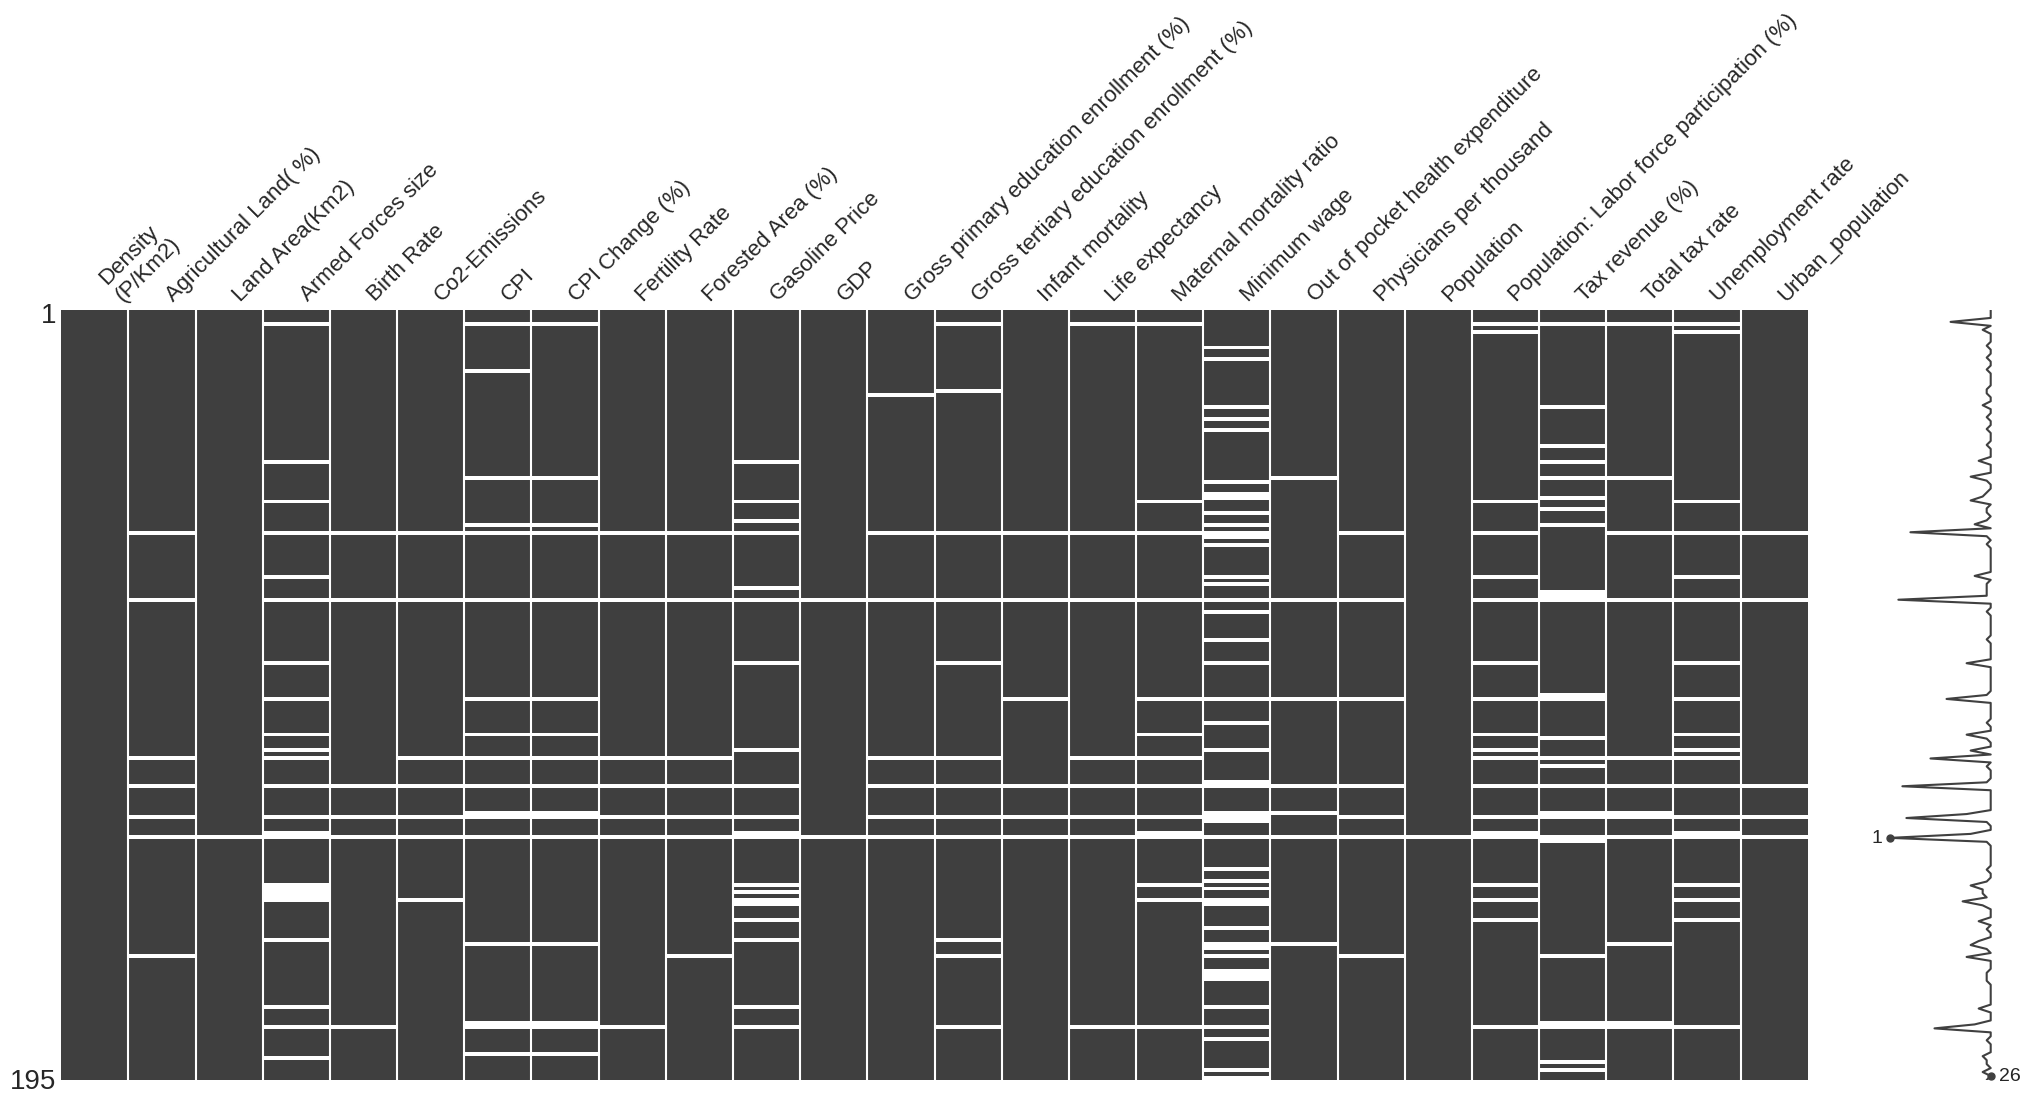

In [11]:
msngo.matrix(df)

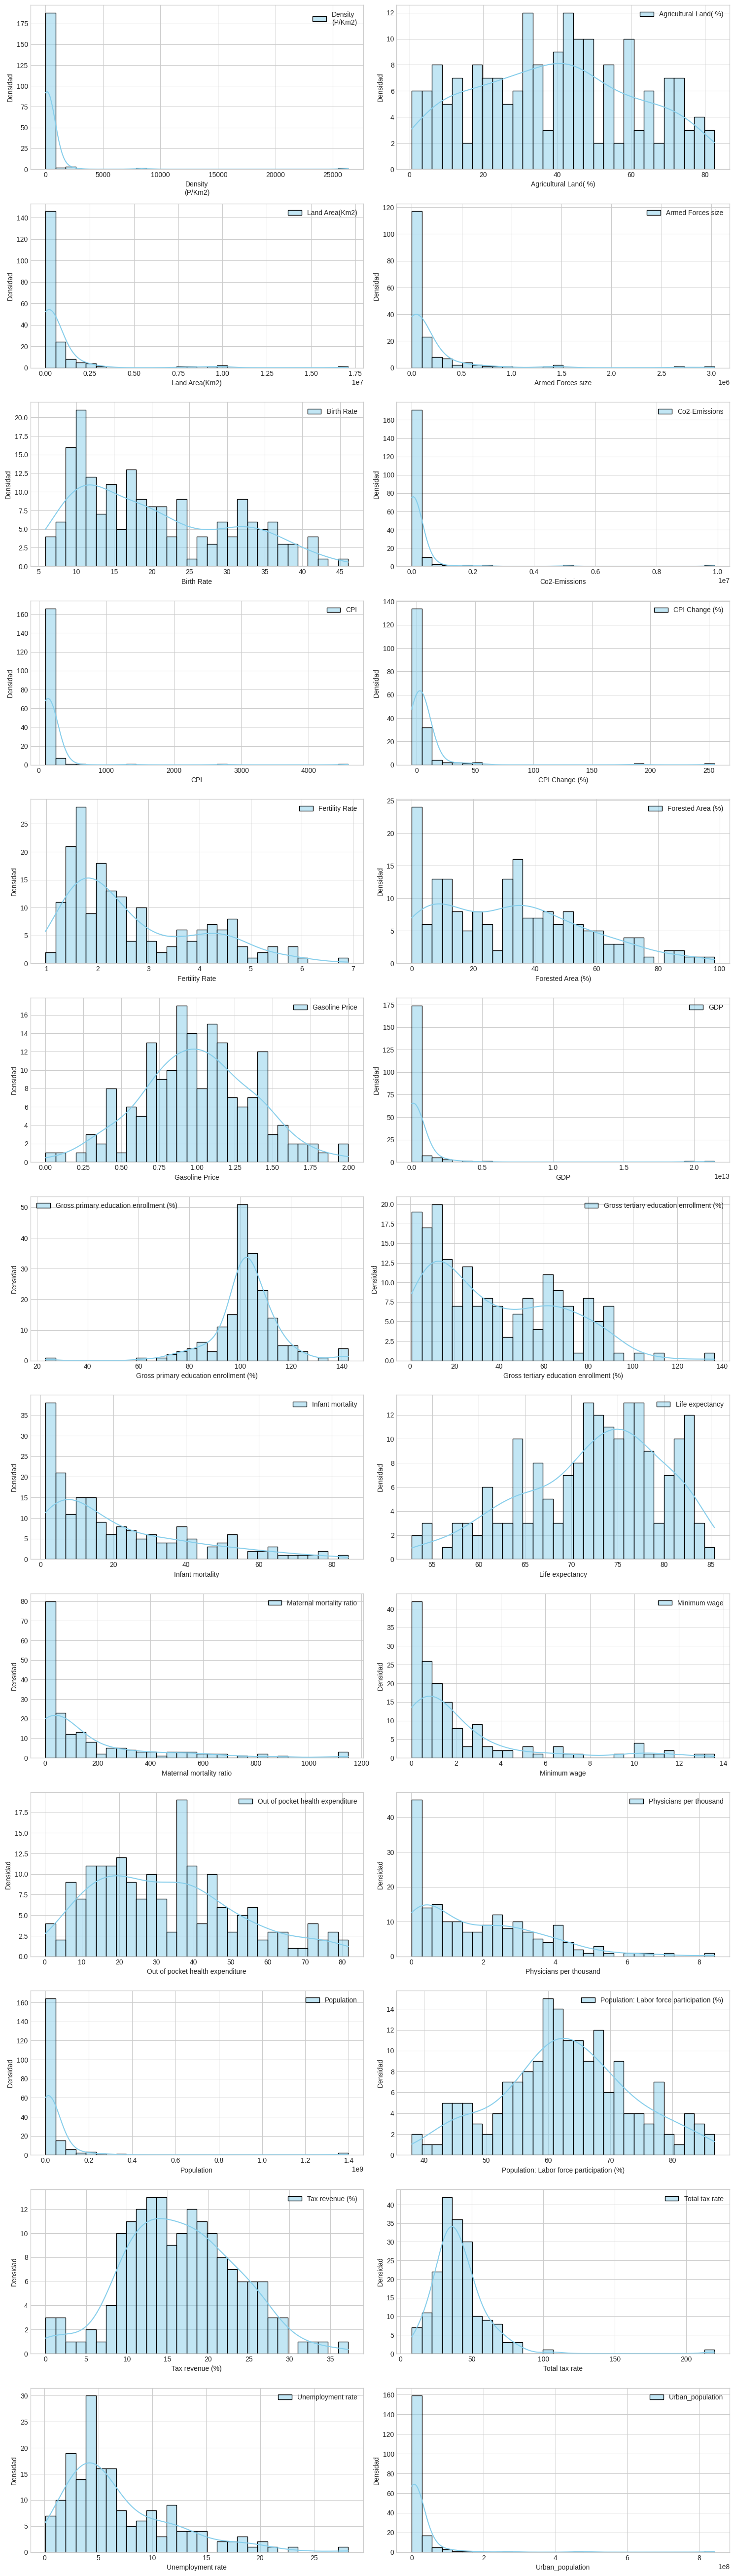

In [12]:
plt.rcParams["figure.figsize"] = (15, 60)
k=1
for col in df.columns:
    plt.subplot(15,2,k)
    k=k+1
    plt.xlabel(f"{col}")
    plt.ylabel('Densidad')
    density = stats.gaussian_kde(df[col].dropna())
    sns.histplot(df[col], color='skyblue', bins=30, label=col, kde=True)  
    plt.legend()
    
plt.tight_layout()


Al observar los graficos nos damos cuenta que varias columnas siguen una distribucion similar, por ejemplo la emision de CO2 y la poblacion de los paises, cosa que tiene sentido 

In [13]:
plt.rcParams["figure.figsize"] = (30, 30)

<Axes: >

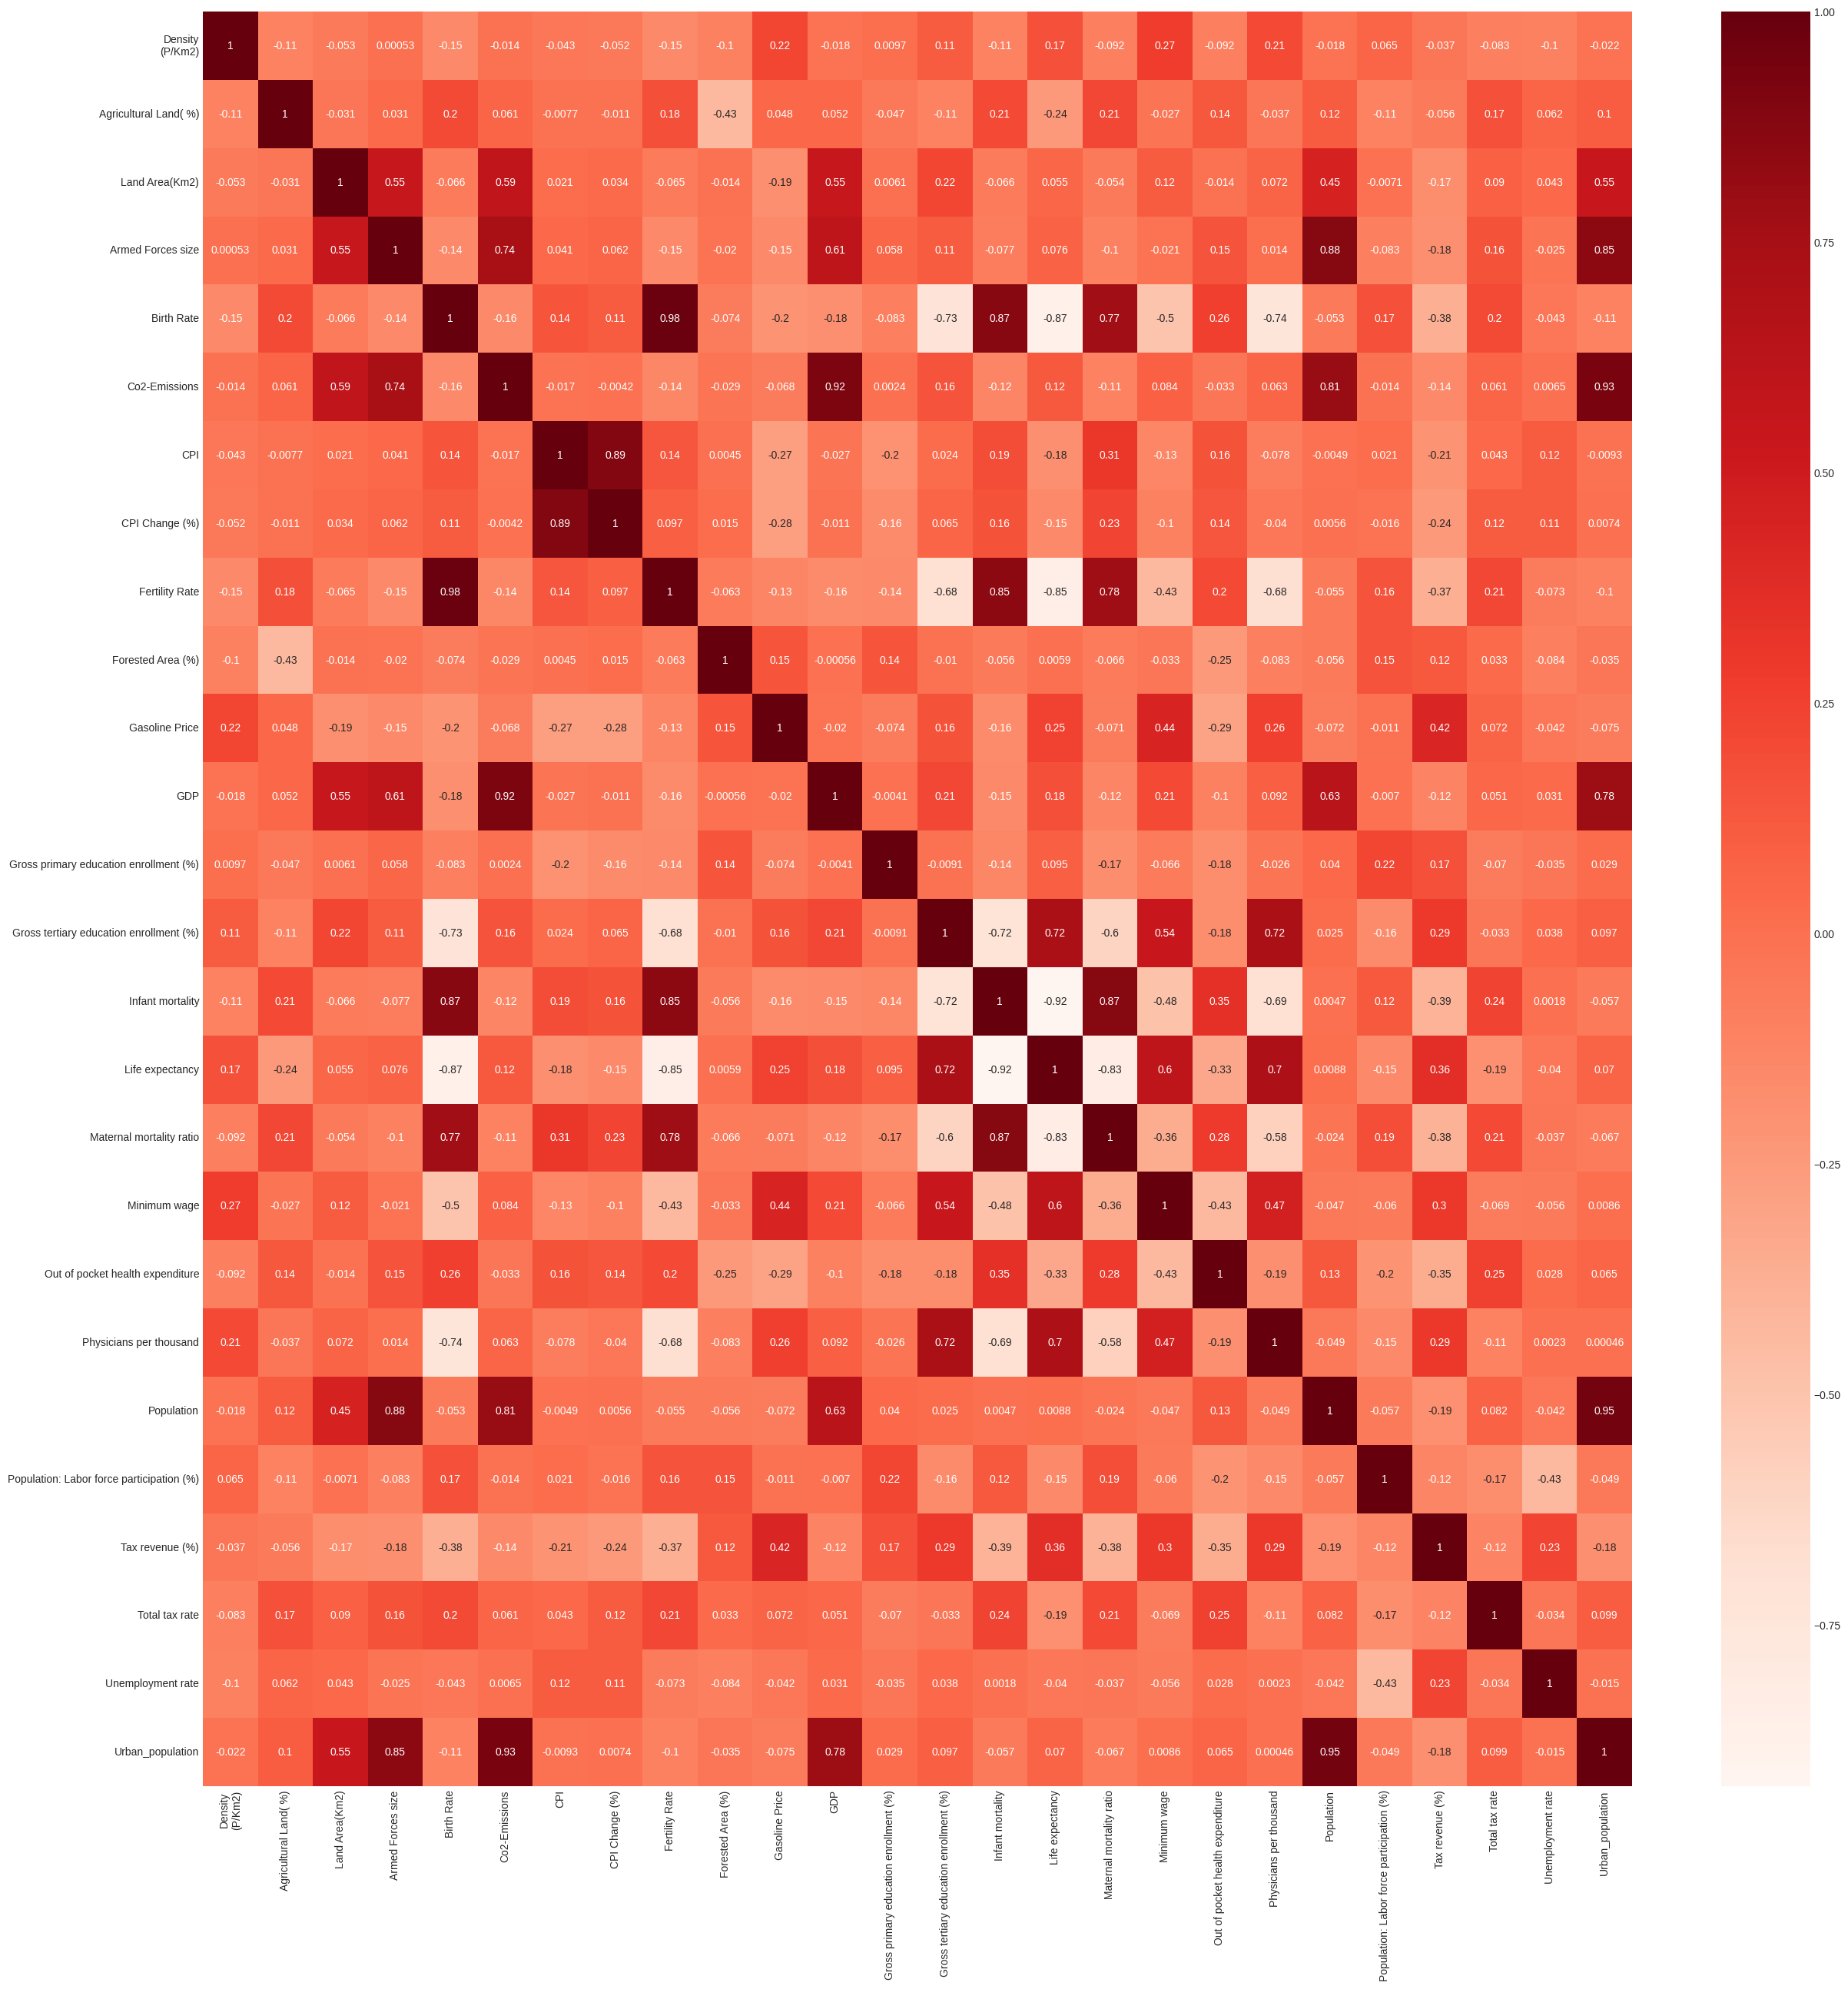

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='Reds')

<Axes: >

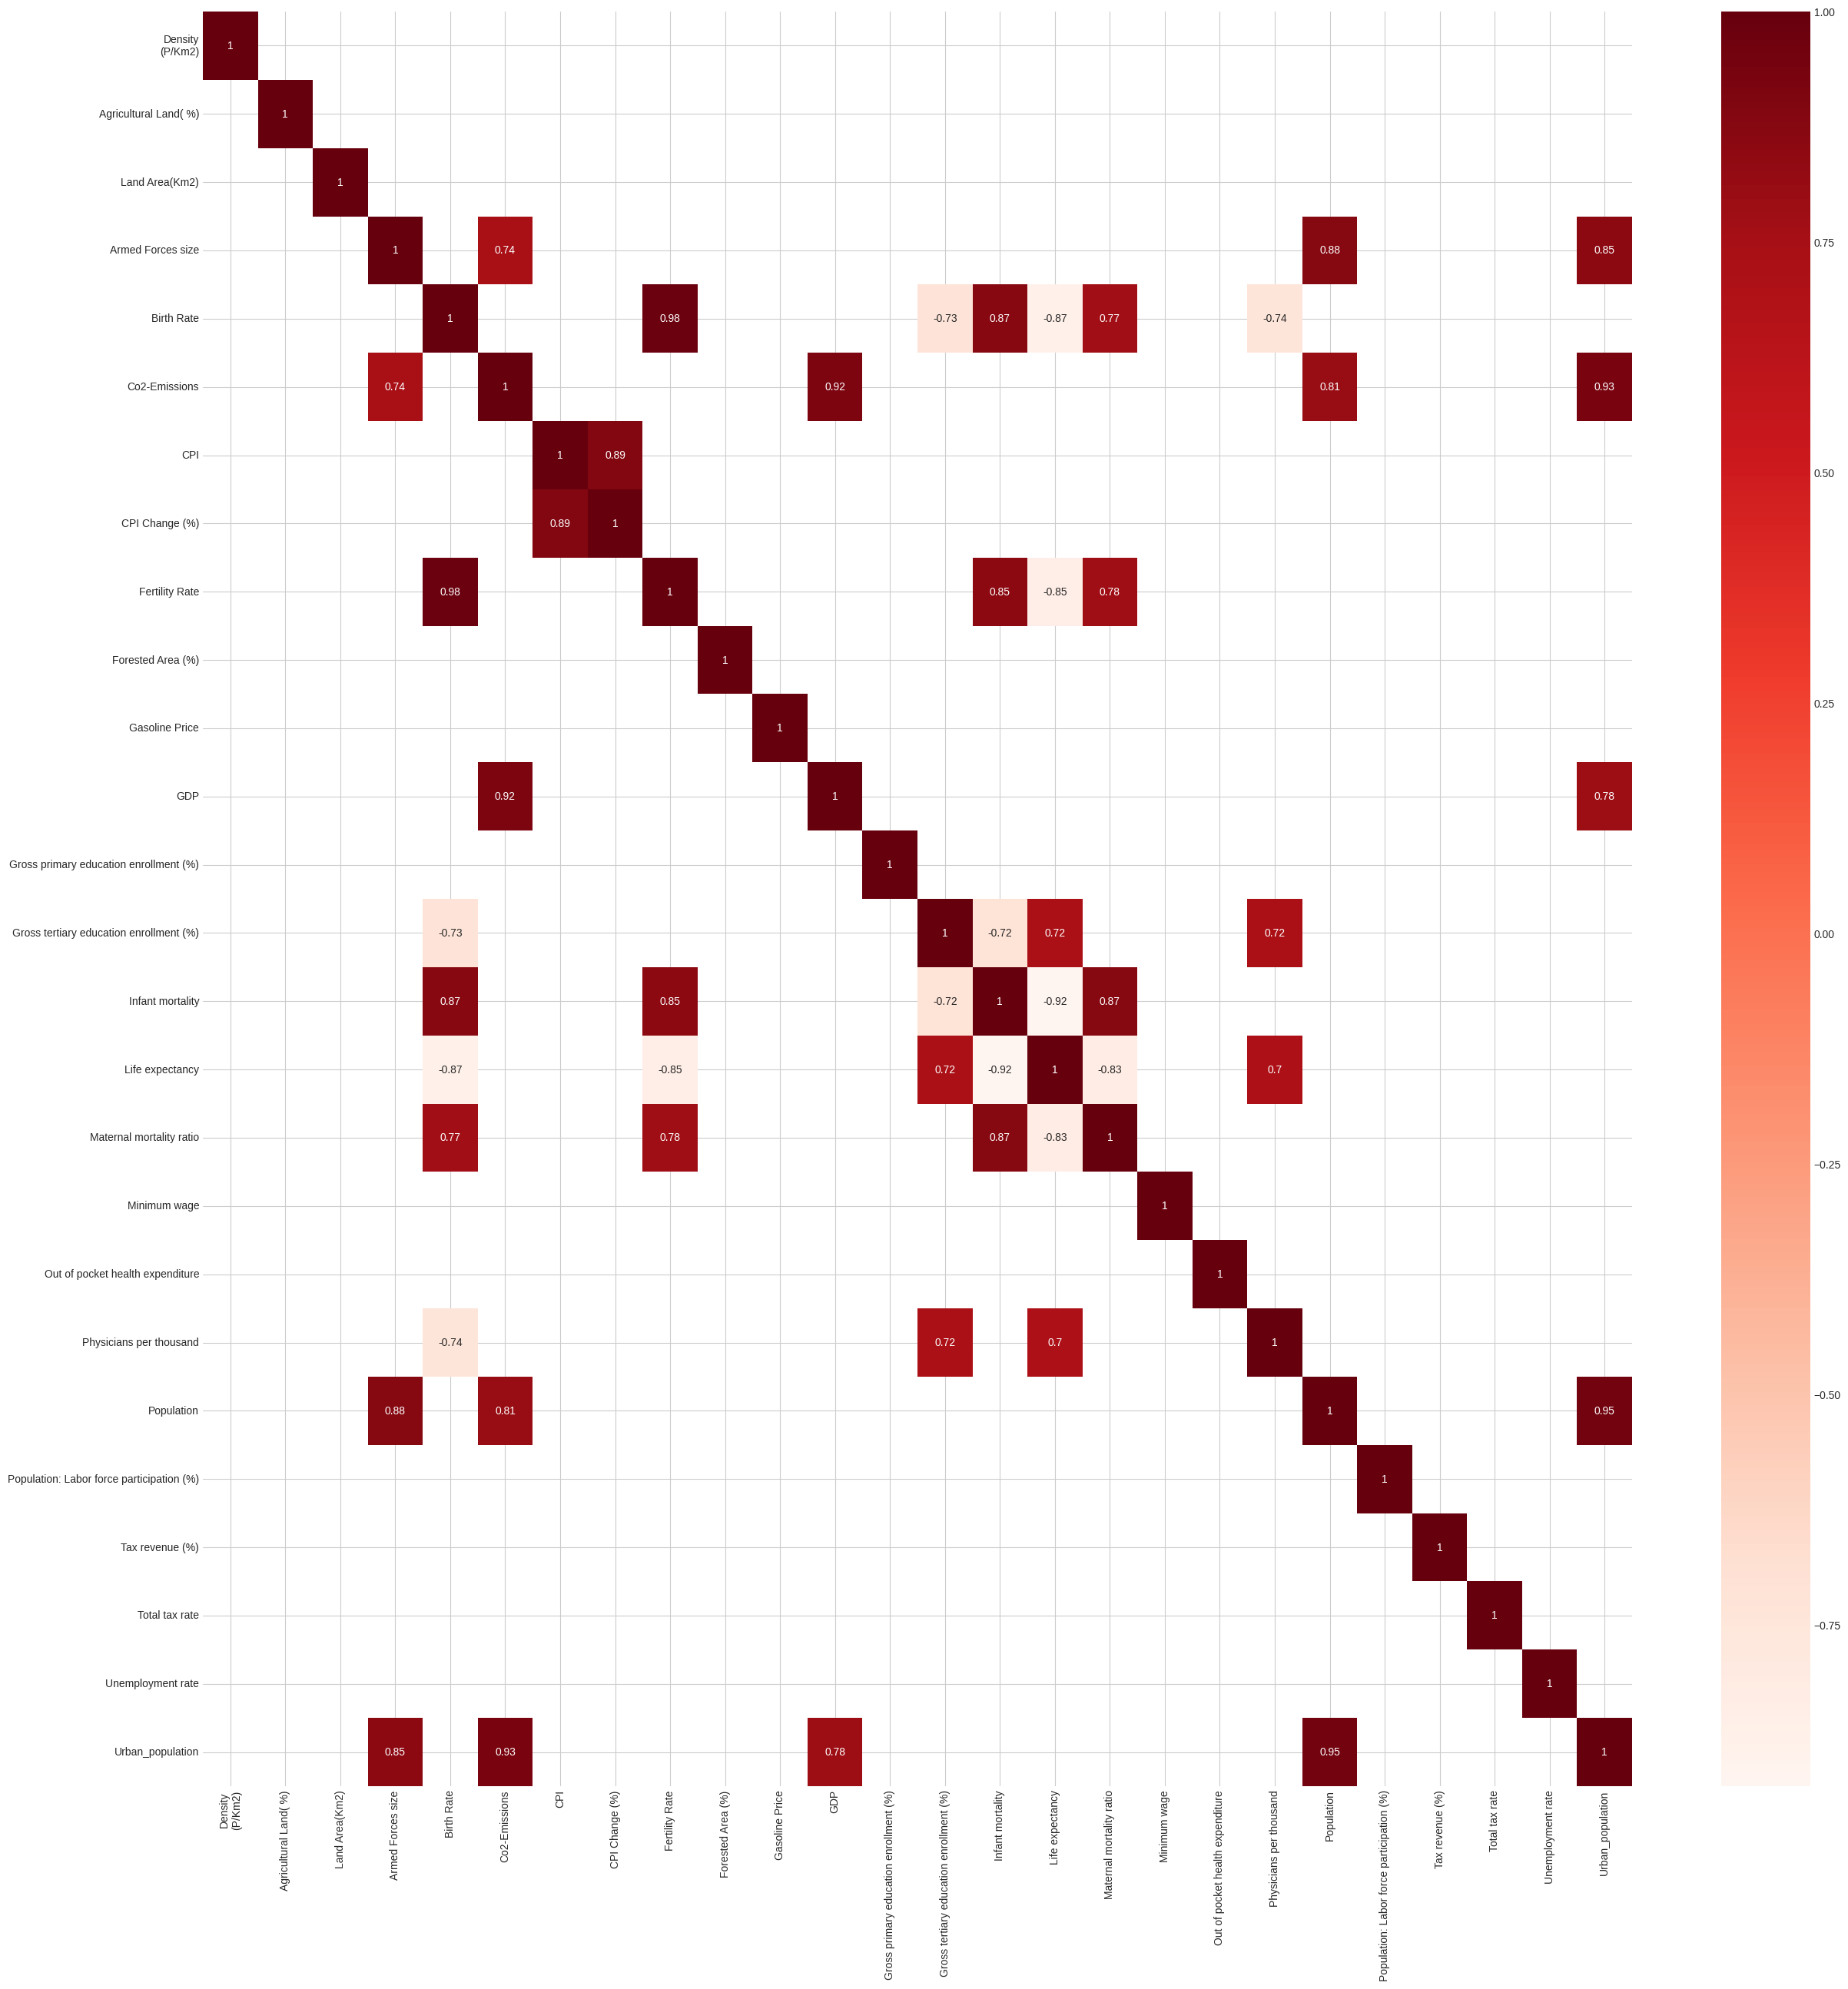

In [15]:
sns.heatmap(df.corr()[(df.corr()>=0.7) | (df.corr()<=-0.7)], annot=True, cmap='Reds')


Esto lo confirmamos al ver que estos dos indicadores tienen una correlacion de un 0.81, adicionalmente podemos mencionar que tiene una correlacion mayor con la poblacion urbana, la que alcanza un 0.93

### Pregunta 2 
De las variables codificadas numéricamente, ¿hay pares de ellas en la que parezca
haber correlación? ¿Para cuál(es) de ellas se observa más claramente?


Para esto tomaremos las columnas que se mencionan anteriormente, Emisiones de CO2 y Poblacion Urbana 

In [16]:
df_corr = df[['Co2-Emissions', 'Urban_population']]

<Axes: >

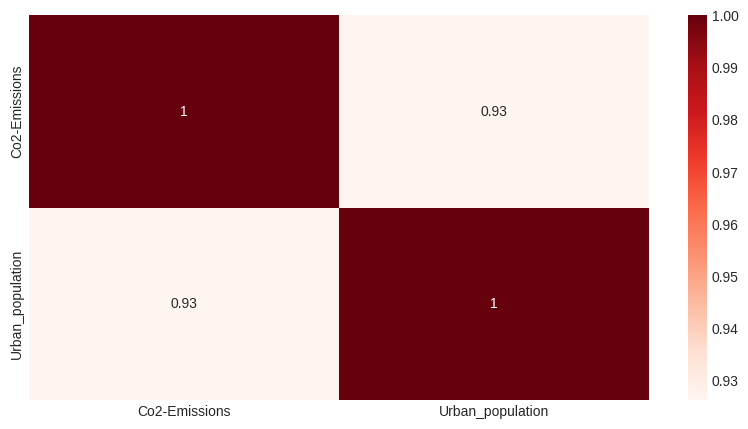

In [17]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.heatmap(df_corr.corr(), annot=True, cmap='Reds')

### Pregunta 3
Considera los dos pares de variables anteriores y elimina en cada caso los faltantes
y atípicos. Justifica en cada caso tu procedimiento.


In [18]:
df_corr.head(10)

,Co2-Emissions,Urban_population
Country,,
Afghanistan,8672,9797273
Albania,4536,1747593
Algeria,150006,31510100
Andorra,469,67873
Angola,34693,21061025
Antigua and Barbuda,557,23800
Argentina,201348,41339571
Armenia,5156,1869848
Australia,375908,21844756


Usamos el metodo visto anteriormente para ver graficamente los valores faltantes

<Axes: >

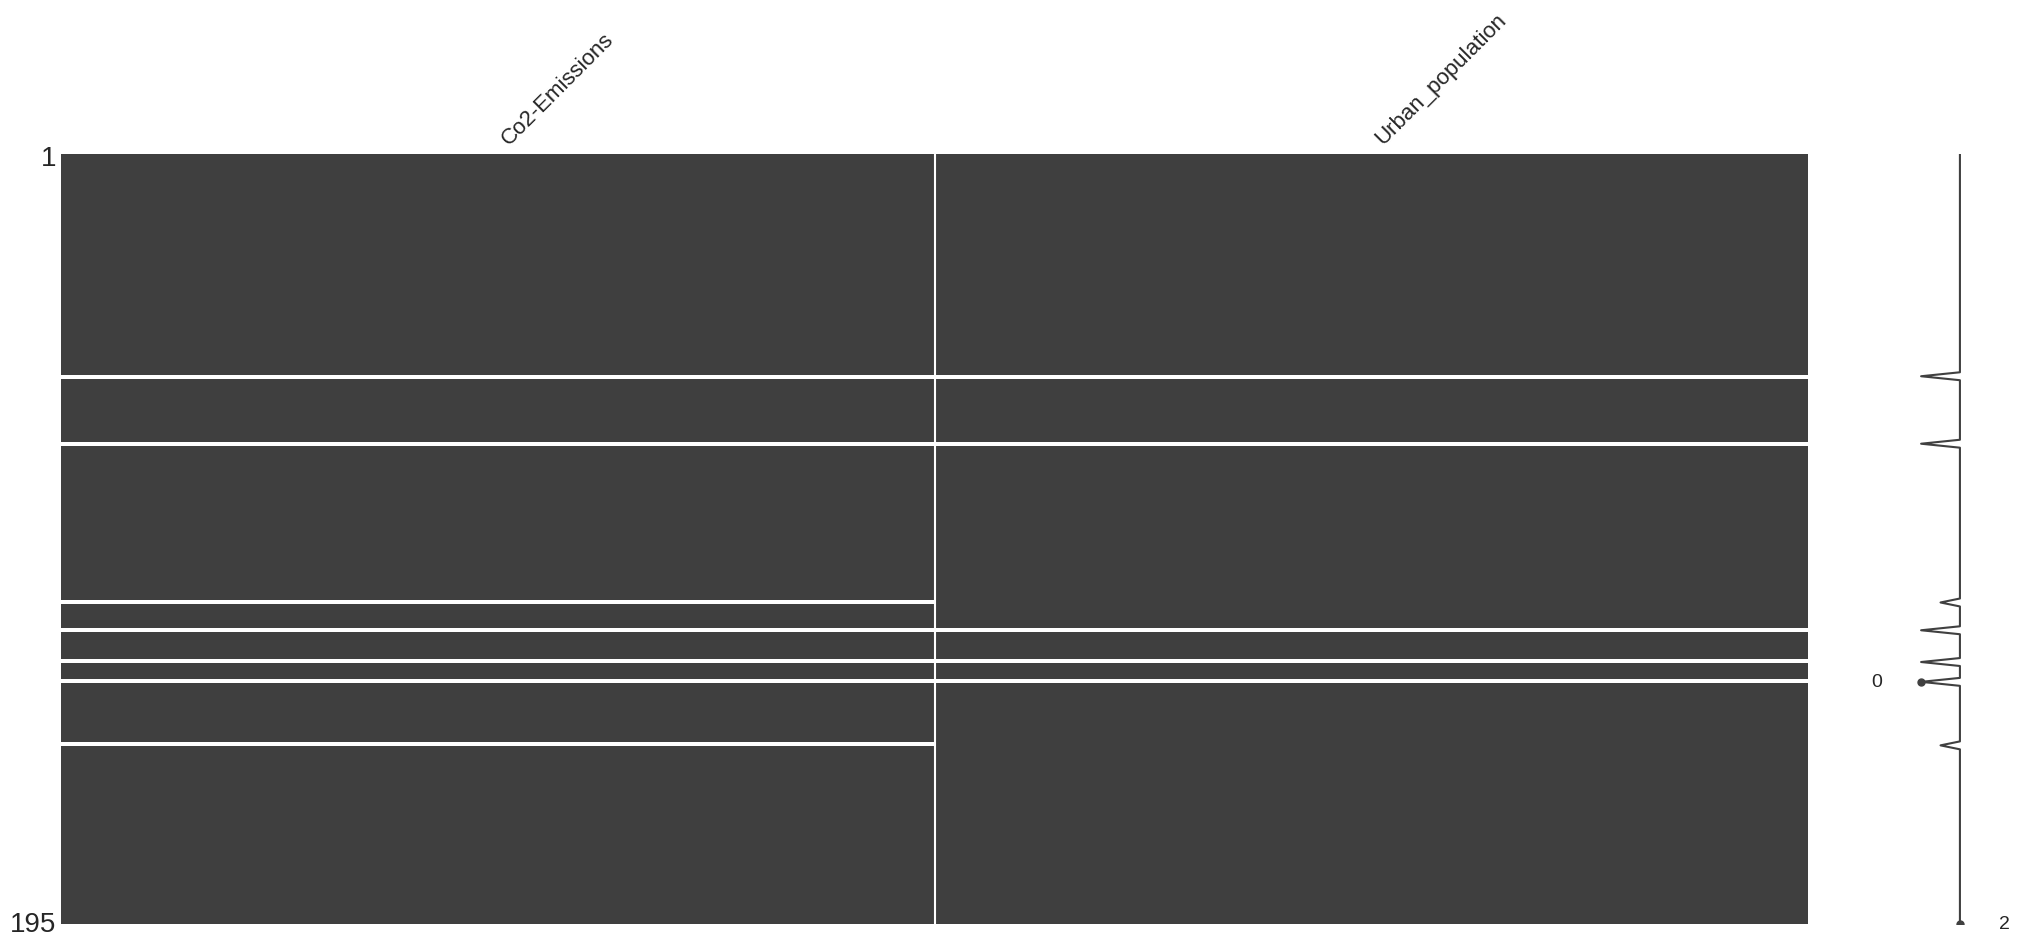

In [19]:
msngo.matrix(df_corr)

In [20]:
df_corr = df_corr.dropna()

Con los valores nulos eliminados procedemos a ver los valores atipicos mediante la aplicacion del rango interquartil 

In [21]:
Q1 = np.percentile(df_corr['Urban_population'], 25)
Q3 = np.percentile(df_corr['Urban_population'], 75)
IQR = Q3-Q1
limite_inferior = Q1-1.5*IQR
limite_superior = Q3+1.5*IQR
df_corr = df_corr[(df_corr['Urban_population'] >= limite_inferior) & (df_corr['Urban_population']<= limite_superior)]

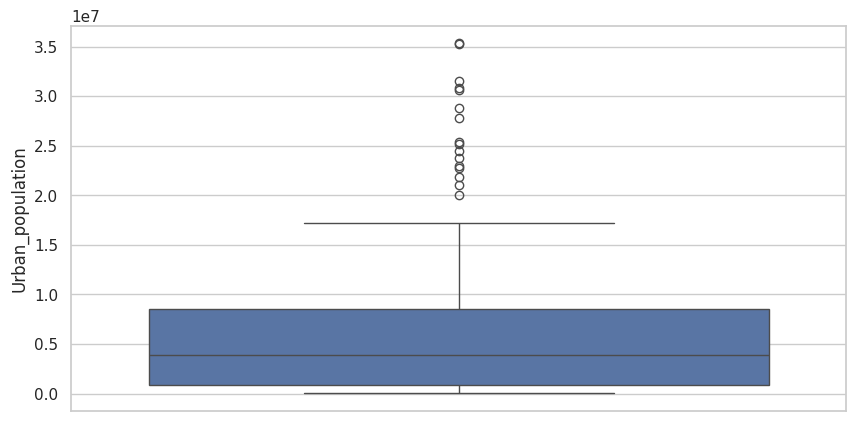

In [22]:

sns.set(style='whitegrid')
sns.boxplot(y='Urban_population', data=df_corr)
plt.ylabel('Urban_population')
plt.show()

In [23]:
Q1 = np.percentile(df_corr['Co2-Emissions'], 25)
Q3 = np.percentile(df_corr['Co2-Emissions'], 75)
IQR = Q3-Q1
limite_inferior = Q1-1.5*IQR
limite_superior = Q3+1.5*IQR
df_corr = df_corr[(df_corr['Co2-Emissions'] >= limite_inferior) & (df_corr['Co2-Emissions']<= limite_superior)]

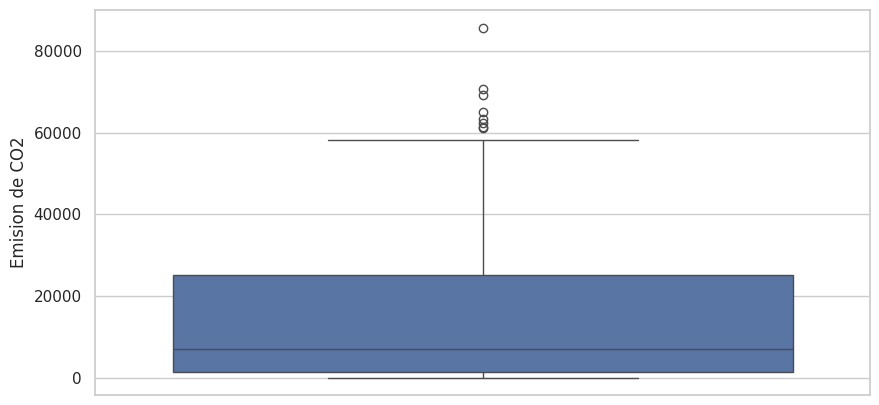

In [24]:
sns.set(style='whitegrid')
sns.boxplot(y='Co2-Emissions', data=df_corr)
plt.ylabel('Emision de CO2')
plt.show()

### Pregunta 4
Construye un gráfico para verificar la correlación entre estas variables, ahora con los
datos preparados. Compara con lo obtenido anteriormente.


<Axes: >

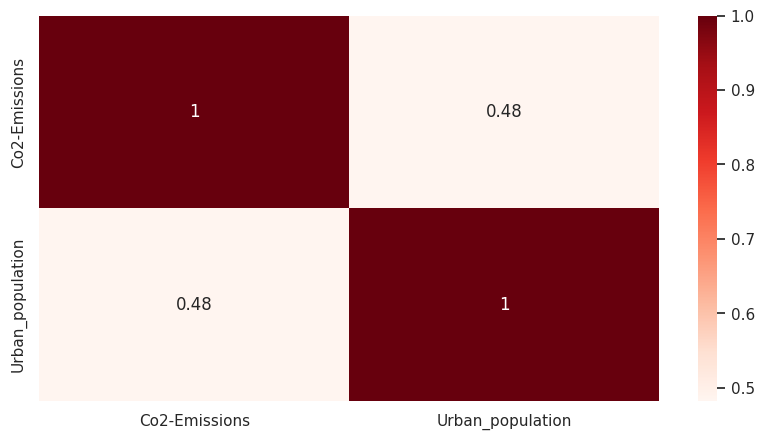

In [25]:
sns.heatmap(df_corr.corr(), annot=True, cmap='Reds')

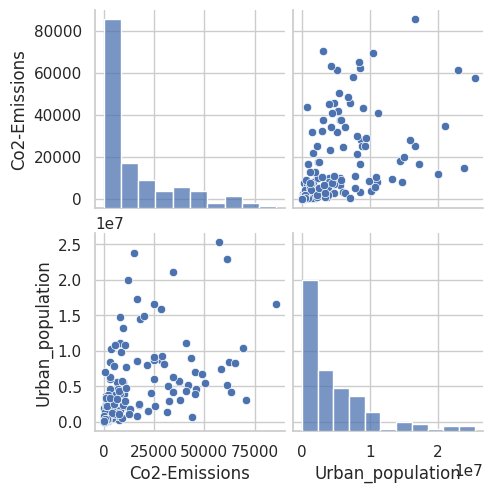

In [26]:
sns.pairplot(df_corr)

Con los datos nuevos podemos dar cuenta que la correlacion a bajado mucho, del 0.92 al 0.48, esto indica que los valores atipicos que teniamos afectaban enormemente el valor de la correlacion

### Pregunta 5
Realiza lo mismo para comparar la cantidad de médicos por cada mil personas y la
esperanza de vida. ¿Qué puedes concluir?


<Axes: >

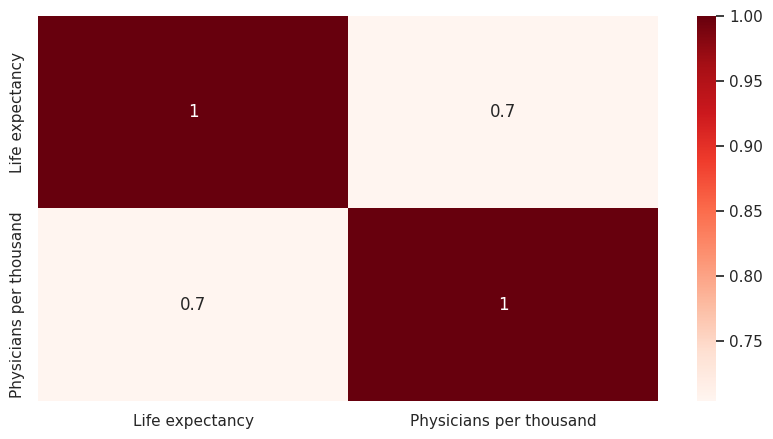

In [31]:
df_med_esp = df[['Life expectancy', 'Physicians per thousand']]
df_med_esp = df_med_esp.dropna()
sns.heatmap(df_med_esp.corr(), annot=True, cmap='Reds')

In [30]:
Q1 = np.percentile(df_med_esp['Life expectancy'], 25)
Q3 = np.percentile(df_med_esp['Life expectancy'], 75)
IQR = Q3-Q1
limite_inferior = Q1-1.5*IQR
limite_superior = Q3+1.5*IQR
df_corr = df_med_esp[(df_med_esp['Life expectancy'] >= limite_inferior) & (df_med_esp['Life expectancy']<= limite_superior)]

sns.set(style='whitegrid')
sns.boxplot(y='Life expectancy', data=df_corr)
plt.ylabel('Esperanza de vida')
plt.show()

KeyError: 'Life expectancy'

### Pregunta 6
Construye un gráfico para representar la población total de los países y su producto
interno bruto. Prepara los datos y escoge el gráfico adecuado (si es necesario, limpia
y/o transforma los datos). Justifica.